In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
import time
from Doublet_Functions import calcDoubletFraction, getInstrinsicViscosity, getStress

## Intrinsic viscosity
use second half

In [3]:
start_time = time.time()

timesteps = 2000
phis = [3.8, 4.7, 6.0, 6.9, 7.9, 9.2, 9.9]
angles = [90-10*i for i in range(18)]
Ca_list = [(i+1)*0.01 for i in range(20)]

intrinsic_eta = np.zeros((len(phis), len(Ca_list)))
for phi_index, phi in enumerate(phis):
    print('phi = ', phi)
    for Ca_index, Ca in enumerate(Ca_list):
        for angle in angles:
            result = getInstrinsicViscosity(phi, Ca, 0, timesteps, angle)
            intrinsic_eta[phi_index, Ca_index] += np.mean(result[-int(timesteps/2):])
            
intrinsic_eta = intrinsic_eta/len(angles)

plt.figure(figsize = (16,12))
for phi_index, phi in enumerate(phis):
    plt.plot(Ca_list, intrinsic_eta[phi_index, :], label = 'phi = {}'.format(phi))
plt.xlabel('Ca', fontsize = 20)
plt.ylabel(r'$\left[ \eta \right]$', fontsize = 20)
plt.legend(prop={'size': 20}, loc = 1)
plt.title(r'$\left[ \eta \right]$'+'vs Ca (Two-cell system, second half time series)', fontsize = 20)
plt.savefig("./Pictures/TwoCellSystem_IntrinsicViscosity_vs_Ca_more_phis.png", dpi = 300)

print('Total time elapsed = ', time.time()-start_time)

phi =  3.8


KeyboardInterrupt: 

## Elastic stress tensor yx

In [ ]:
start_time = time.time()
stress_category_id = 0

phis = [3.8, 4.7, 6.0, 6.9, 7.9, 9.2, 9.9]
angles = [90-10*i for i in range(18)]
Ca_list = [(i+1)*0.01 for i in range(20)]

stress = np.zeros((len(phis), len(Ca_list)))

for phi_index, phi in enumerate(phis):
    print('phi = ', phi)
    for Ca_index, Ca in enumerate(Ca_list):
        for angle_index, angle in enumerate(angles):
            stress[phi_index, Ca_index] += np.mean(getStress(phi, Ca, stress_category_id, 1000, 2000, angle)[:,3])
stress = stress/len(angles)
            
plt.figure(figsize = (16,12))
plt.title(r'$\sigma _{elas, yx}$'+'vs Ca (Two-cell system, second half times series)', fontsize = 30)
for phi_index, phi in enumerate(phis):
    plt.plot(Ca_list, stress[phi_index, :], label = 'phi = {}'.format(phi))
plt.legend(prop={'size': 20}, loc = 1)
plt.xlabel('Ca', fontsize = 20)
plt.savefig("./Pictures/TwoCellSystem_StressTensor_vs_Ca_more_phis.png", dpi = 300)    
print('Total time elapsed = ', time.time()-start_time)

## Doublet fraction
use second half

In [2]:
# Make mean doublet fraction (ensemble) versus Ca plot here

start_time = time.time()

ncycle = 2000
phis = [3.8, 4.7, 6.0, 6.9, 7.9, 9.2, 9.9]
Ca_list = [(i+1)*0.01 for i in range(20)]
angles = [90-10*i for i in range(18)]
r = 0.65

dfa_g = np.zeros((len(phis), len(Ca_list)))
dfa_s = np.zeros((len(phis), len(Ca_list)))

for phi_index, phi in enumerate(phis):
    print('phi = ', phi)
    for Ca_index, Ca in enumerate(Ca_list):
        for angle_index, angle in enumerate(angles):
            result = calcDoubletFraction(phi, Ca, 1, r, 0, angle)
            dfa_s[phi_index, Ca_index] += np.mean(result[0][0][-int(result[2]/2):])
            dfa_g[phi_index, Ca_index] += np.mean(result[1][0][-int(result[2]/2):])
dfa_g = dfa_g/len(angles) # average over the ensemble
dfa_s = dfa_s/len(angles) # average over the ensemble

phi =  3.8
phi =  4.7
phi =  6.0
phi =  6.9
phi =  7.9
phi =  9.2
phi =  9.9


Total time elapsed =  1256.887885093689


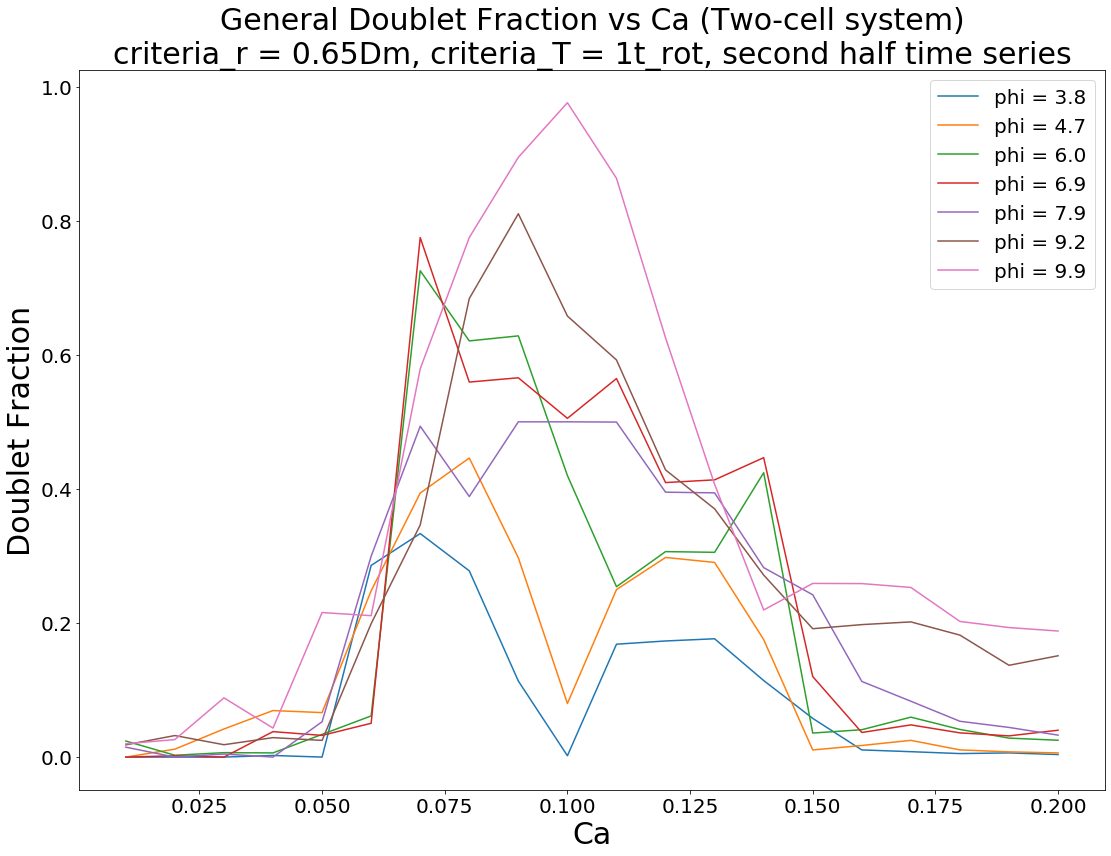

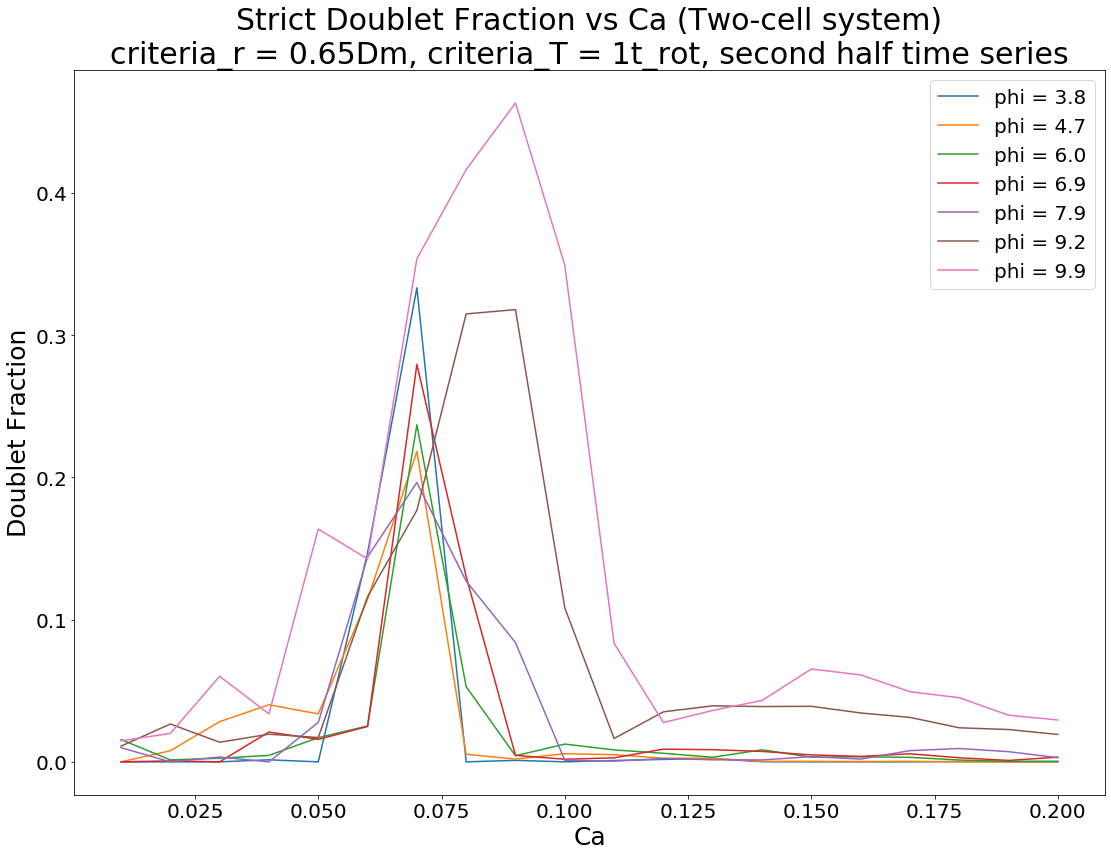

In [11]:
plt.figure(figsize = (16,12))
for phi_index, phi in enumerate(phis):
    plt.plot(Ca_list, dfa_g[phi_index, :] ,label = 'phi = {}'.format(phi))
    
plt.xlabel("Ca", fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel("Doublet Fraction", fontsize = 30)
plt.yticks(fontsize = 20)
plt.legend(prop={'size': 20})
plt.title("General Doublet Fraction vs Ca (Two-cell system)\ncriteria_r = {}Dm, criteria_T = 1t_rot, second half time series".format(r), fontsize = 30)
plt.tight_layout()
plt.savefig("./Pictures/TwoCellSystem_GeneralDoubletFraction_vs_Ca_SecondHalf_r_{}.png".format(r), dpi = 300)

plt.figure(figsize = (16,12))
for phi_index, phi in enumerate(phis):
    plt.plot(Ca_list, dfa_s[phi_index, :] ,label = 'phi = {}'.format(phi))
    
plt.xlabel("Ca", fontsize = 25)
plt.xticks(fontsize = 20)
plt.ylabel("Doublet Fraction", fontsize = 25)
plt.yticks(fontsize = 20)
plt.legend(prop={'size': 20})
plt.title("Strict Doublet Fraction vs Ca (Two-cell system)\ncriteria_r = {}Dm, criteria_T = 1t_rot, second half time series".format(r), fontsize = 30)
plt.tight_layout()
plt.savefig("./Pictures/TwoCellSystem_StrictDoubletFraction_vs_Ca_SecondHalf_r_{}.png".format(r), dpi = 300)

print('Total time elapsed = ', time.time()-start_time)

## Phase diagram

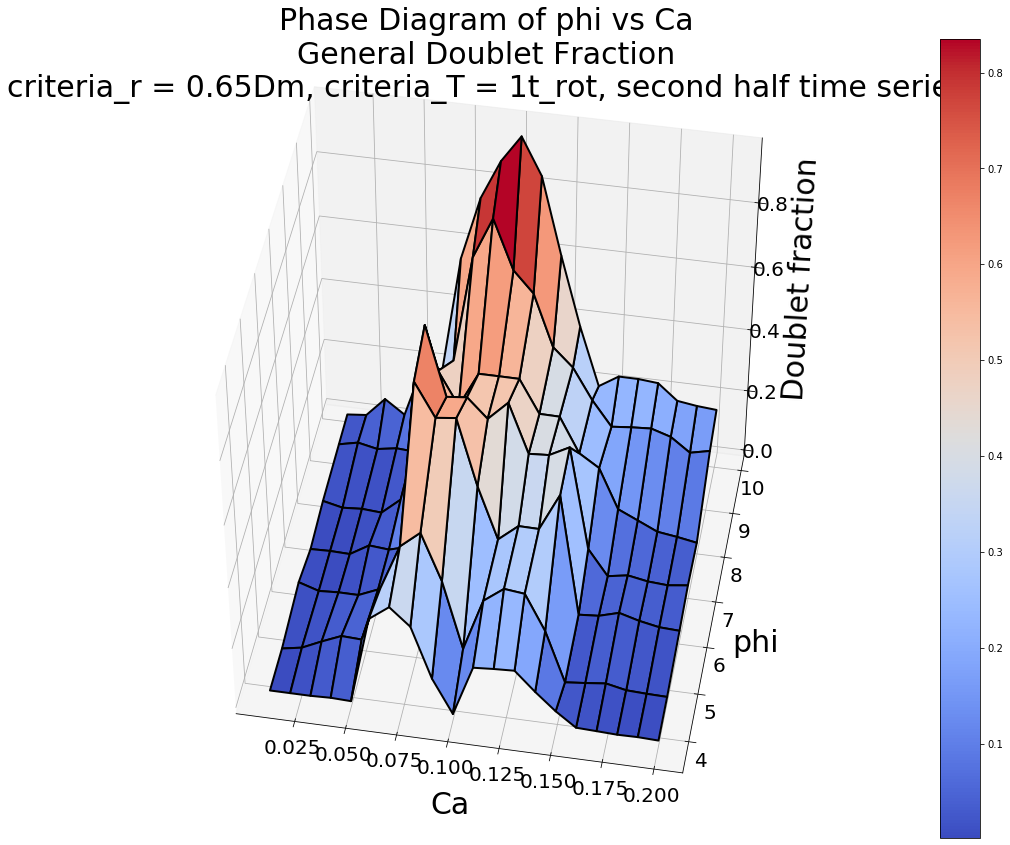

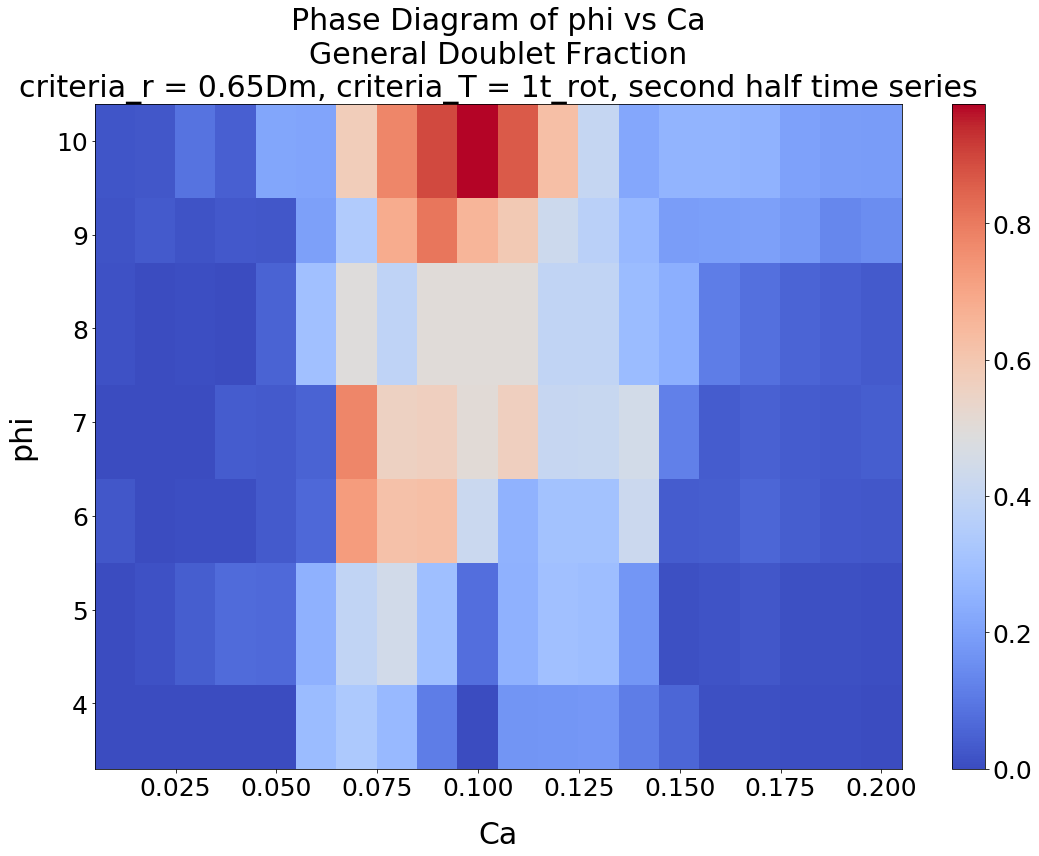

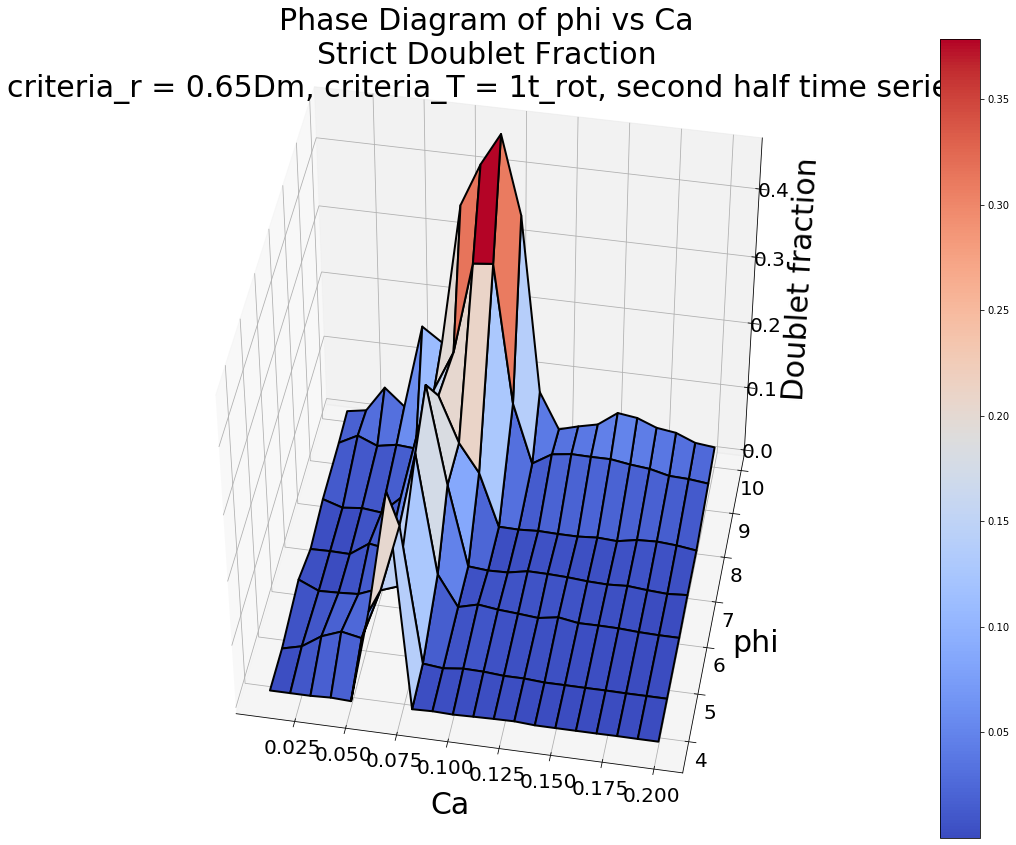

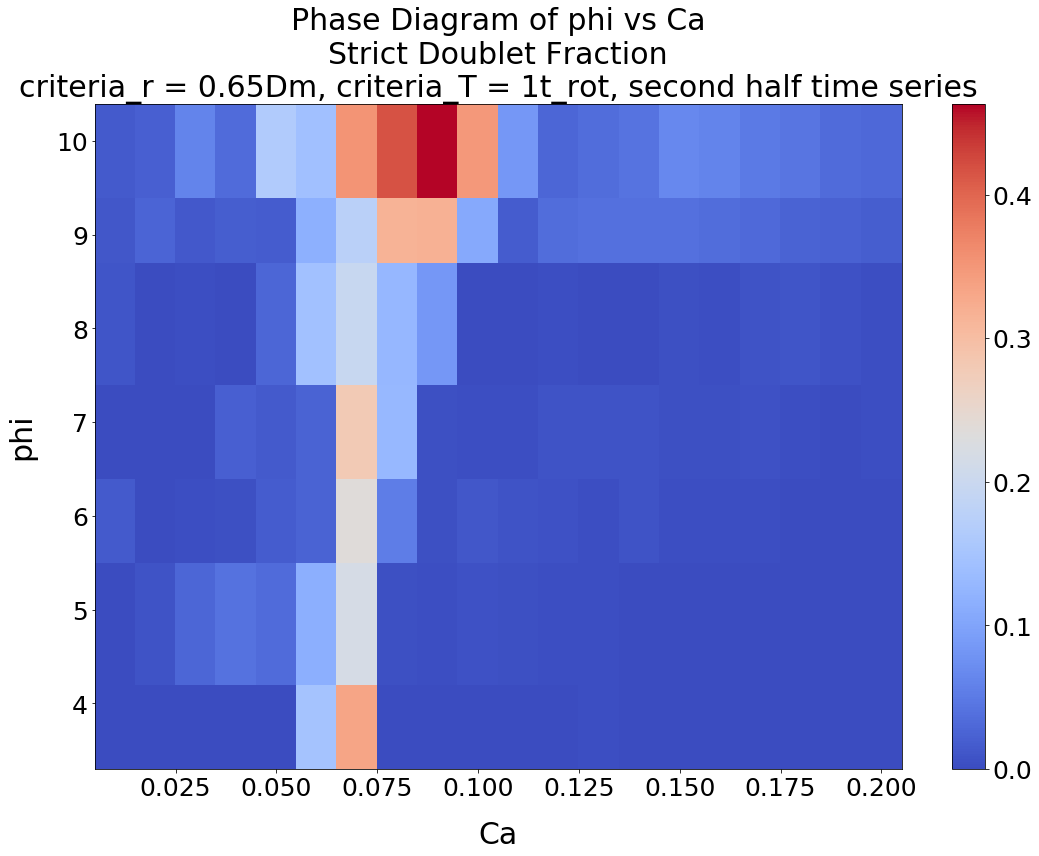

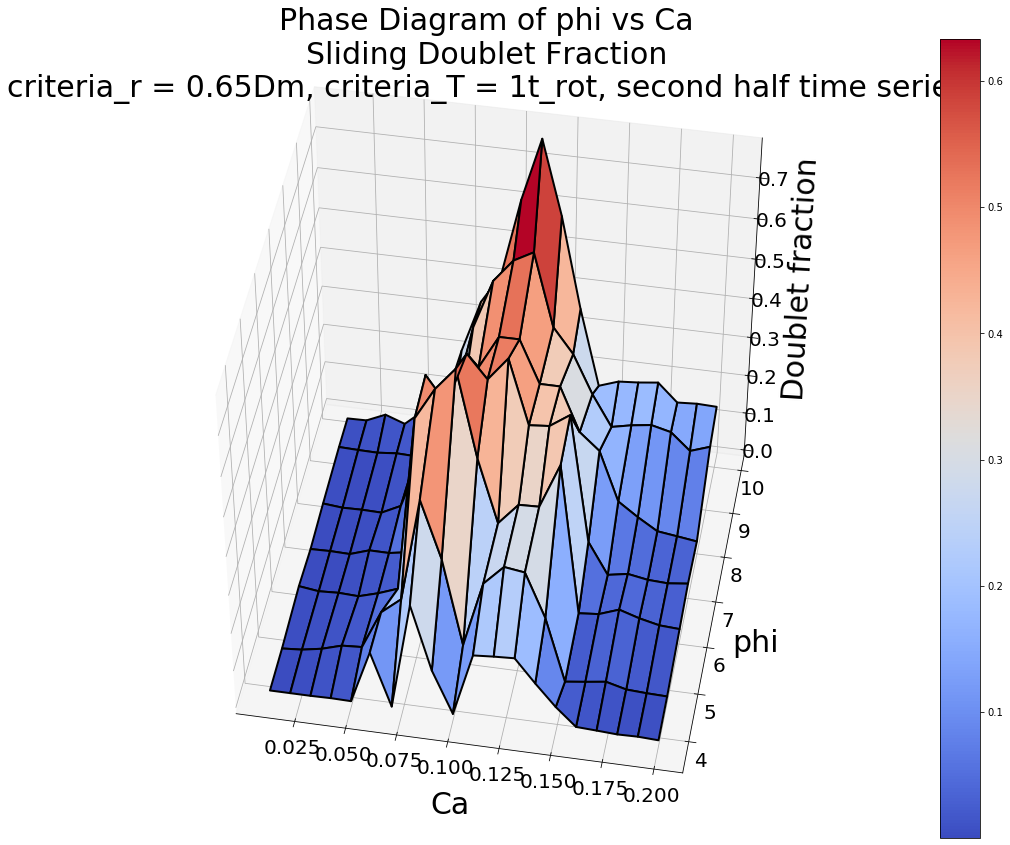

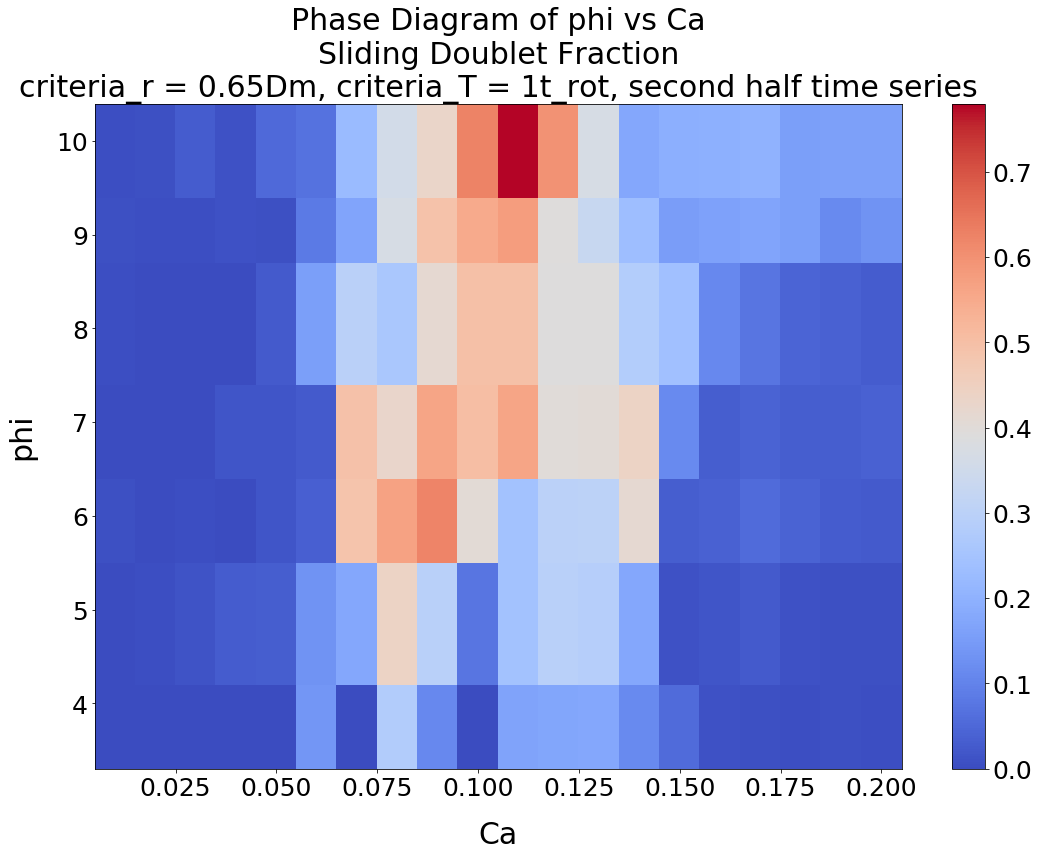

In [18]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams


def Z(x, y, df):
    return df[x, y]

for i in range(3):
    if i == 0:
        df = dfa_g
        text1 = 'General Doublet Fraction'
        text2 = 'GeneralDoubletFraction'
    elif i == 1:
        df = dfa_s
        text1 = 'Strict Doublet Fraction'
        text2 = 'StrictDoubletFraction'
    else:
        df = dfa_g - dfa_s
        text1 = 'Sliding Doublet Fraction'
        text2 = 'SlidingDoubletFraction'
        
    fig = plt.figure(figsize = (16,12))
    ax = fig.gca(projection='3d')
    index_X, index_Y = np.meshgrid(np.array(list(range(len(phis)))), np.array(list(range(len(Ca_list)))))
    X, Y = np.meshgrid(np.array(phis), np.array(Ca_list))
    surf = ax.plot_surface(Y, X, Z(index_X, index_Y, df), cmap=cm.coolwarm, edgecolor = 'black', linewidth = 2)

    ax.set_zlim(0.0, np.max(df))
    ax.set_xlabel('Ca', fontsize = 30)
    ax.set_ylabel('phi', fontsize = 30)
    ax.set_zlabel('Doublet fraction', fontsize = 30)
    rcParams['axes.labelpad'] = 20
    ax.tick_params(labelsize = 20)
    ax.set_title('Phase Diagram of phi vs Ca\n'+text1+'\ncriteria_r = {}Dm, criteria_T = 1t_rot, second half time series'.format(r), fontsize = 30)
    ax.view_init(azim = -80, elev = 45)
    fig.colorbar(surf, ax = ax)
    fig.tight_layout()
    plt.savefig('./Pictures/TwoCellSystem_PhaseDiagram_3D_{}.png'.format(text2), dpi = 300)


    fig, ax = plt.subplots(figsize = (16,12))
    grid_phi = np.array(phis+[phis[-1]+1])-0.5
    grid_Ca = np.array(Ca_list+[Ca_list[-1]+0.01])-0.005
    X, Y = np.meshgrid(grid_phi, grid_Ca)
    im = ax.pcolormesh(Y, X, Z(index_X, index_Y, df), cmap=cm.coolwarm)
    cb = fig.colorbar(im, ax = ax)
    cb.ax.tick_params(labelsize = 25)
    ax.set_title('Phase Diagram of phi vs Ca\n'+text1+'\ncriteria_r = {}Dm, criteria_T = 1t_rot, second half time series'.format(r), fontsize = 30)
    ax.set_xlabel('Ca', fontsize = 30)
    ax.set_ylabel('phi', fontsize = 30)
    ax.tick_params(labelsize = 25)
    fig.tight_layout()
    plt.savefig('./Pictures/TwoCellSystem_PhaseDiagram_2D_{}.png'.format(text2), dpi = 300)

## All variables in the same plot for each phi

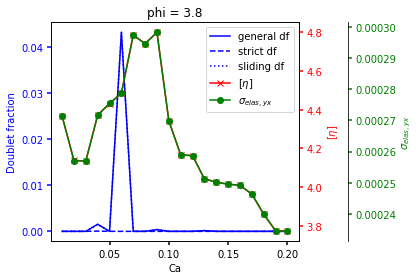

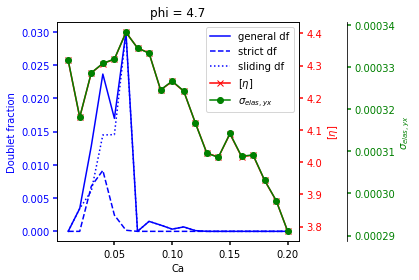

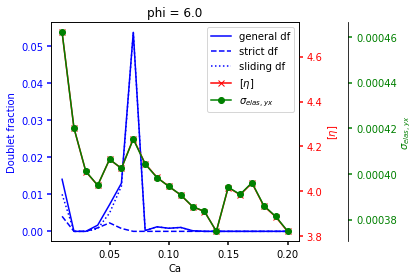

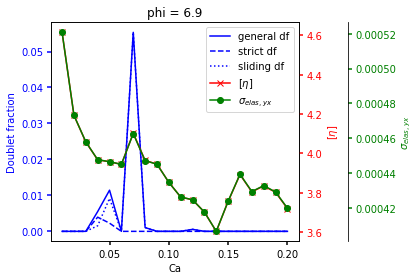

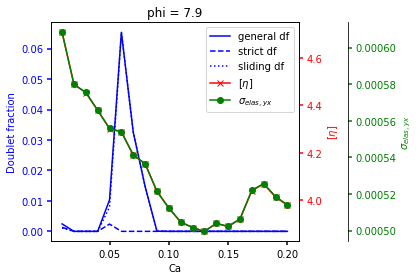

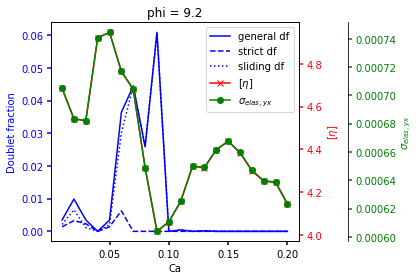

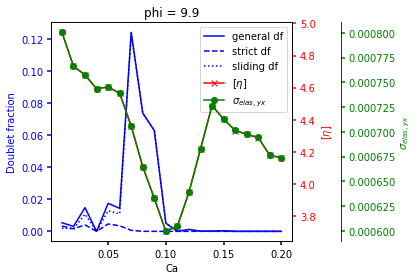

In [13]:
phis = [3.8, 4.7, 6.0, 6.9, 7.9, 9.2, 9.9]
Ca_list = [(i+1)*0.01 for i in range(20)]

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

for phi_index, phi in enumerate(phis):
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)

    par1 = host.twinx()
    par2 = host.twinx()
    par2.spines["right"].set_position(("axes", 1.2))
    make_patch_spines_invisible(par2)
    par2.spines["right"].set_visible(True)
    
    p1_1, = host.plot(Ca_list, dfa_g[phi_index, :], "b-", label = "general df")
    p1_2, = host.plot(Ca_list, dfa_s[phi_index, :], "b-", label = "strict df", linestyle = '--')
    p1_3, = host.plot(Ca_list, dfa_g[phi_index, :] - dfa_s[phi_index, :], "b-", label = "sliding df", linestyle = ':')
    p2, = par1.plot(Ca_list, intrinsic_eta[phi_index, :], "r-", label = r'$\left[ \eta \right]$', marker = 'x')
    p3, = par2.plot(Ca_list, stress[phi_index, :], "g-", label = r'$\sigma _{elas, yx}$', marker = 'o')

    host.set_title('phi = {}, criteria_r = {}Dm'.format(phi, r))
    host.set_xlabel("Ca")
    host.set_ylabel("Doublet fraction")
    par1.set_ylabel(r'$\left[ \eta \right]$')
    par2.set_ylabel(r'$\sigma _{elas, yx}$')

    host.yaxis.label.set_color(p1_1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1_1.get_color(), **tkw)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    host.tick_params(axis='x', **tkw)

    lines = [p1_1, p1_2, p1_3, p2, p3]
    host.legend(lines, [l.get_label() for l in lines])
    fig.tight_layout()
    plt.savefig('./Pictures/TwoCellSystem_ThreeVariables_phi_{}_r_{}.png'.format(phi,r), dpi = 300)